In [26]:
import sklearn
sklearn.__version__

'1.1.3'

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("autos.csv", header=0, sep=',', encoding='Latin1',)

In [29]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [31]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [32]:
data.isnull().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dateCreated            False
nrOfPictures           False
postalCode             False
lastSeen               False
dtype: bool

In [33]:
data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [34]:
# filling the missing values with mean

data["vehicleType"].fillna(data["vehicleType"].mode()[0],inplace = True)
data["gearbox"].fillna(data["gearbox"].mode()[0],inplace = True)
data["model"].fillna(data["model"].mode()[0],inplace = True)
data["fuelType"].fillna(data["fuelType"].mode()[0],inplace = True)
data["notRepairedDamage"].fillna(data["notRepairedDamage"].mode()[0],inplace = True)

In [35]:
data.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          371528 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              371528 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                371528 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             371528 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    371528 non-nu

In [39]:
print(data.offerType.value_counts())

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64


In [41]:
data[data.offerType != 'Gesuch']
data=data.drop('offerType',1)

AttributeError: 'DataFrame' object has no attribute 'offerType'

In [42]:
data[data.seller != 'gewerblich']
data = data.drop('seller',1)

C:\Users\shami\AppData\Local\Temp\ipykernel_35720\2660527002.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('seller',1)


In [43]:
data.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [45]:
print(data.shape)

(371528, 18)


In [46]:
data = data[(data.powerPS>50)&(data.powerPS<900)]
print(data.shape)

(319709, 18)


In [47]:
data = data[(data.yearOfRegistration >= 1950) & (data.yearOfRegistration <2017)]
print(data.shape)

(309171, 18)


In [51]:
new_df = data.copy()
new_df = new_df.drop_duplicates(['price','vehicleType','yearOfRegistration','gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType','notRepairedDamage'])

In [52]:
new_df.gearbox.replace(('manuell','automatik'),('manual','automatic'),inplace=True)
new_df.fuelType.replace(('benzin','andere','elektro'),('petrol','others','electric'),inplace=True)
new_df.vehicleType.replace(('kleinwagen','cabrio','kombi','andere'),('small car','convertible','combination','others'),inplace=True)
new_df.notRepairedDamage.replace(('ja','nein'),('Yes','No'),inplace=True)

In [53]:
new_df = new_df[(new_df.price >= 100) & (new_df.price <= 150000)]

new_df['notRepairedDamage'].fillna(value='not-declared',inplace=True)
new_df['fuelType'].fillna(value='not-declared',inplace=True)
new_df['gearbox'].fillna(value='not-declared',inplace=True)
new_df['vehicleType'].fillna(value='not-declared',inplace=True)
new_df['model'].fillna(value='not-declared',inplace=True)

In [54]:
new_df.to_csv("autos_preprocessed.csv")

In [58]:
from sklearn.preprocessing import LabelEncoder

labels = ['gearbox','notRepairedDamage','model','brand','fuelType','vehicleType']

mapper = {}
for i in labels:
    mapper[i] = LabelEncoder()
    mapper[i].fit(new_df[i])
    tr = mapper[i].transform(new_df[i])
    np.save(str('classes'+i+'.npy'), mapper[i].classes_)
    print(i,":",mapper[i])
    new_df.loc[:,i+'_labels'] = pd.Series(tr, index=new_df.index)

labeled = new_df[['price','yearOfRegistration','powerPS','kilometer','monthOfRegistration']
                + [x+"_labels" for x in labels]]

print(labeled.columns)

gearbox : LabelEncoder()
notRepairedDamage : LabelEncoder()
model : LabelEncoder()
brand : LabelEncoder()
fuelType : LabelEncoder()
vehicleType : LabelEncoder()
Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_labels', 'notRepairedDamage_labels',
       'model_labels', 'brand_labels', 'fuelType_labels',
       'vehicleType_labels'],
      dtype='object')


In [60]:
Y = labeled.iloc[:,0].values
X = labeled.iloc[:,1:].values

In [63]:
X.shape

(274252, 10)

In [65]:
Y.shape

(274252,)

In [67]:
Y = Y.reshape(-1,1)

In [68]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 3)

In [74]:
#model building
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [75]:
regressor = RandomForestRegressor(n_estimators=1000, max_depth=10,random_state=34)
#fitting the model
regressor.fit(X_train, np.ravel(Y_train,order='C'))

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=34)

In [77]:
#predicting the values to test set
y_pred =regressor.predict(X_test)

#printing the Accuracy
print(r2_score(Y_test,y_pred))

0.8431443963888312


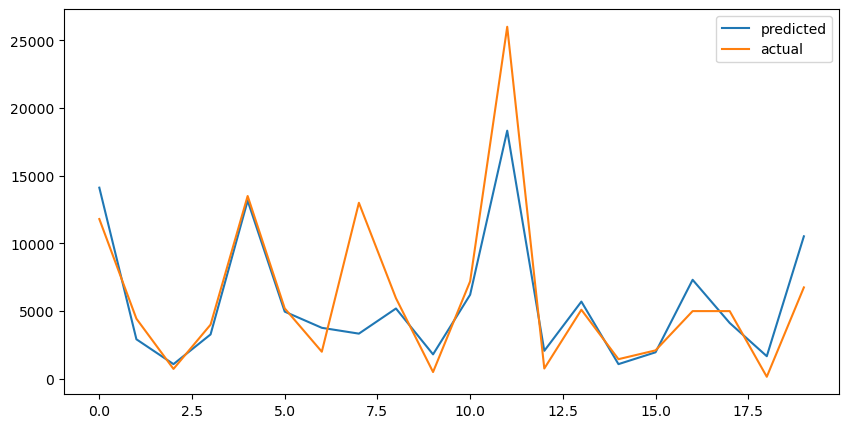

In [83]:
#plot for predicted and actual price
plt.figure(figsize=(10,5))
plt.plot(y_pred[0:20])
plt.plot(np.array(Y_test[0:20]))
plt.legend(["predicted","actual"])
plt.show()

In [79]:
#saving the model
import pickle
filename = 'resale_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [84]:
new_df.model.nunique()

249

In [85]:
new_df.brand.nunique()

40

In [86]:
new_df.fuelType.unique()

array(['diesel', 'petrol', 'lpg', 'others', 'hybrid', 'cng', 'electric'],
      dtype=object)